<a href="https://colab.research.google.com/github/nataliawcislo/Analysis-of-Olympic-Game/blob/main/Olympic_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('athlete_events.csv')
df_noc = pd.read_csv('noc_regions.csv')

In [ ]:
df_noc.head()
df = pd.merge(df, df_noc, on='NOC')
del df['notes']
df.head()


ID           Name  ... Medal  region
0     1      A Dijiang  ...   NaN   China
1     2       A Lamusi  ...   NaN   China
2   602  Abudoureheman  ...   NaN   China
3  1463      Ai Linuer  ...   NaN   China
4  1464      Ai Yanhan  ...   NaN   China

[5 rows x 16 columns]

In [ ]:
df['Bmi'] = round(df.Weight / (df.Height / 100 * df.Height / 100), 1)


In [ ]:
countries_top = df.Team.value_counts().sort_values(ascending=False).head(10)
countries_top

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

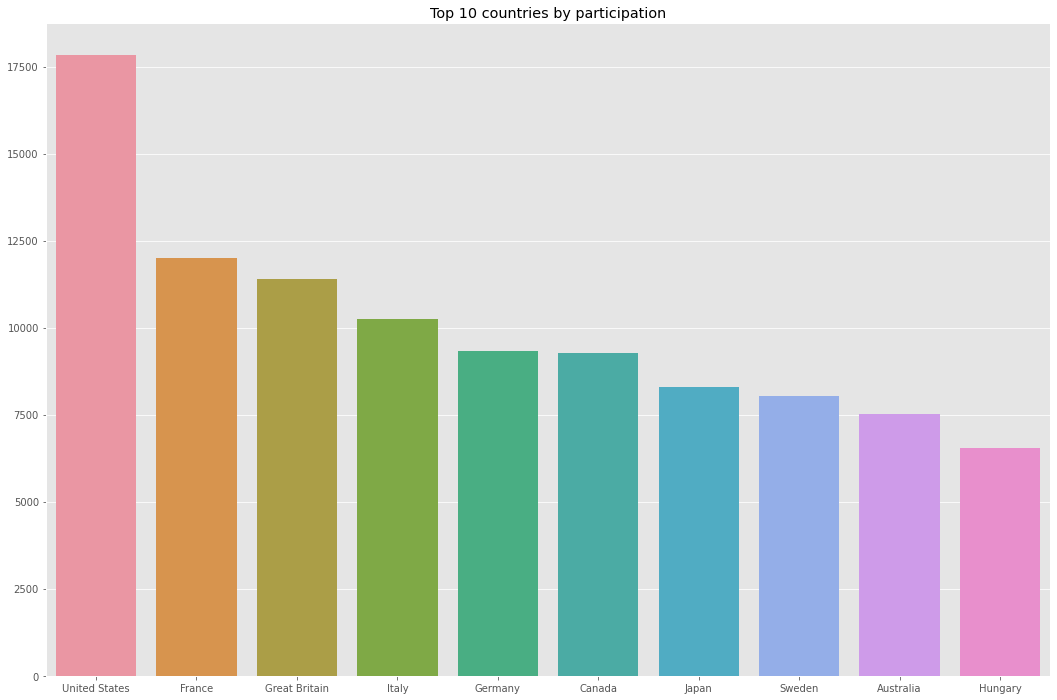

In [ ]:
plt.figure(figsize=(18,12))
plt.style.use('ggplot')
plt.title("Top 10 countries by participation")
sns.barplot(x=countries_top.index,y=countries_top.values)

([<matplotlib.patches.Wedge at 0x7f83eb4e7d90>,
 [Text(0.7150517826905559, -0.8358833340072395, 'M'),
  Text(-0.7150517044295067, 0.8358834009552155, 'F')],
 [Text(0.3900282451039395, -0.45593636400394877, '72.5%'),
  Text(-0.39002820241609454, 0.4559364005210266, '27.5%')])

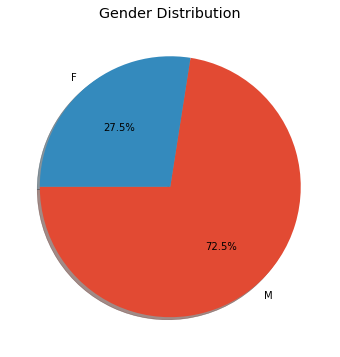

In [ ]:
df.Sex.value_counts()
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(df.Sex.value_counts(), labels=df.Sex.value_counts().index, autopct='%1.1f%%' , startangle=180, shadow=True)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Trend = df_summer.groupby(['Sex', 'Year']).size().reset_index().pivot(columns='Sex', index='Year', values=0).reset_index()
Trend.head()

x, y1, y2 = Trend['Year'], Trend['F'], Trend['M']

fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Female',
                        line=dict(color='Blue', width=2)), secondary_y=False,)
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Male',
                        line=dict(color='Orange', width=2)), secondary_y=True,)

fig.update_layout(
title_text='Number of mean and women athelete over time')

fig.update_layout(title='Variation in count of male and female players',
                 xaxis_title = 'year')

fig.update_yaxes(title_text='Female', secondary_y=False)
fig.update_yaxes(title_text='Male', secondary_y=True)
fig.show()

In [ ]:
fig = px.histogram(df, x='Season', color='Sex', barmode='group',
                  color_discrete_map={'M': 'Orange', 'F': 'Blue'},
                  )
fig.update_layout(
            title = 'Participation of male and female athlete in both season',
            yaxis_title='Athlete count')

Text(0.5, 1.0, 'Female athlete over time in summer olympics')

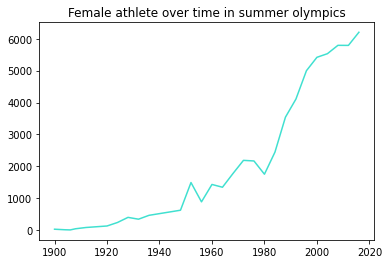

In [ ]:
# Total no. of female athletes in each olympic( Summer/Winter)
f_summer = df[(df.Sex=='F') & (df.Season=='Summer')].groupby('Year').count()['ID'].reset_index(name='Count_of_female_athlete')
plt.plot(f_summer.Year, f_summer.Count_of_female_athlete, color="turquoise")
plt.title('Female athlete over time in summer olympics')

Text(0.5, 1.0, 'Female athlete over time in Winter olympics')

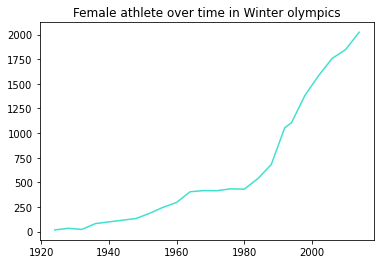

In [ ]:
f_winter = df[(df.Sex=='F') & (df.Season=='Winter')].groupby('Year').count()['ID'].reset_index(name='Count_of_female_athlete')
plt.plot(f_winter.Year, f_winter.Count_of_female_athlete, color="turquoise")
plt.title('Female athlete over time in Winter olympics')

In [ ]:
df_summer = df[df['Season'] == 'Summer']
df_summer_countries_years = df_summer.groupby(['Year', 'region'], as_index=False).agg({'ID': 'count'})


fig = px.scatter_geo(df_summer_countries_years, 
                     locationmode='country names',
                     locations='region', 
                     hover_name="region", 
                     size="ID",
                     animation_frame="Year",
                     projection="natural earth",
                     title='Liczba zawodników igrzysk letnich z danych krajów na przestrzeni lat')
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

In [ ]:
df_winter = df[df['Season'] == 'Winter']

# Winter
df_winter_countries_years = df_winter.groupby(['Year', 'region'], as_index=False).agg({'ID': 'count'})


fig = px.scatter_geo(df_winter_countries_years, 
                     locationmode='country names',
                     locations="region", 
                     hover_name="region", 
                     size="ID",
                     animation_frame="Year",
                     projection="natural earth",
                     title='Liczba zawodników igrzysk zimowych z danych krajów na przestrzeni lat')
fig.update_layout({
    'geo': {
        'resolution': 50
    }
})
fig.show()

In [ ]:
df_medals_bmi = df.dropna()
df_medals_bmi = df_medals_bmi.groupby(['Bmi', 'Medal'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_bmi, x="Bmi", y="ID", color='Medal', title='Zależność liczby medali w zależności od BMI')
fig.show()

In [ ]:
df_age_bmi = df.dropna()
df_age_bmi = df_age_bmi.groupby(['Age', 'Sex'], as_index=False).agg({'Bmi': 'mean', 'ID': 'count'})
df_age_bmi.head()
fig = px.scatter(df_age_bmi, x="Age", y="Bmi", color='Sex', size='ID', title='Zależność BMI od wieku')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution of Athletes')

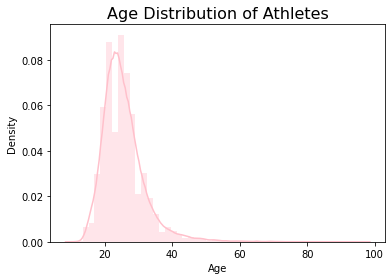

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = sns.distplot(df['Age'].dropna(), color='Pink')
x.set_title('Age Distribution of Athletes', fontsize=16, fontweight=200)





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Height Distribution of Athletes')

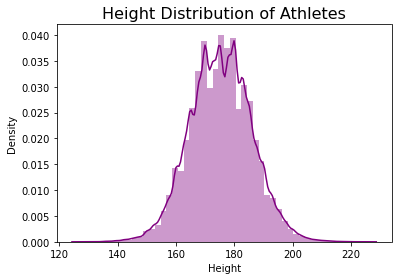

In [ ]:

h.set_title('Height Distribution of Athletes', fontsize=16, fontweight=200)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Weight Distribution of Athletes')

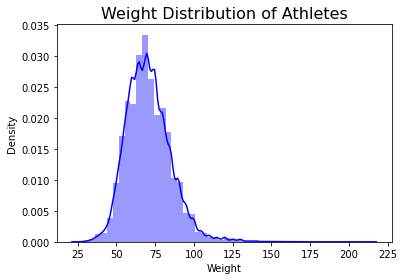

In [ ]:
w = sns.distplot(df['Weight'].dropna(), color='Blue')
w.set_title('Weight Distribution of Athletes', fontsize=16, fontweight=200)

In [ ]:
fig = px.scatter(df, x='Weight', y='Height', color='Sport')

fig.update_layout(title='Distribution of height and weight acording to sport')
fig.show()

In [ ]:
df_medals_age = df.dropna()
df_medals_age = df_medals_age.groupby(['Age', 'Medal'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_age, x="Age", y="ID", color='Medal', title='Zależność liczby medali w zależności od wieku')
fig.show()

In [ ]:
df_medals_sex = df_winter.dropna()
df_medals_sex = df_medals_sex.groupby(['Year','Sex'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_sex, x='Year', color='Sex', y='ID', title='Liczb zawodników medalowych igrzysk zimowych w latach')
fig.show()

In [ ]:
df_medals_sex = df_summer.dropna()
df_medals_sex = df_medals_sex.groupby(['Year','Sex'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_sex, x='Year', color='Sex', y='ID', title='Liczb zawodników igrzysk letnich medalowych w latach')
fig.show()

In [ ]:
df_winter_sport = df_winter.groupby(['Year','Sport'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_winter_sport, x='Year', color='Sport', y='ID', title='Licza sportowców danej dyscypliny zimowej na przestrzeni lat')
fig.show()

In [ ]:
df_summer_sport = df_summer.groupby(['Year','Sport'], as_index=False).agg({'ID': 'count'})
df_summer_sport.head()
fig = px.line(df_summer_sport, x='Year', color='Sport', y='ID', title='Licza sportowców danej dyscypliny letniej na przestrzeni lat')
fig.show()

In [ ]:
df_medals_years_country = df_summer.dropna()
df_medals_years_country = df_medals_years_country.groupby(['Year', 'region'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_years_country, x="Year", y="ID", color='region', title='Zależność liczby medali w zależności od kraju pochodzenia zawodnika w zawodach letnich na przestrzeni lat')
fig.show()

In [ ]:
df_medals_years_country = df_winter.dropna()
df_medals_years_country = df_medals_years_country.groupby(['Year', 'region'], as_index=False).agg({'ID': 'count'})
fig = px.line(df_medals_years_country, x="Year", y="ID", color='region', title='Zależność liczby medali w zależności od kraju pochodzenia zawodnika w zawodach zimowych na przestrzeni lat')
fig.show()

In [ ]:
df_name_country = df[['Name', 'region']].drop_duplicates().dropna()

df_name_country['Name'].value_counts().reset_index(name='count').query('count > 1').head(10)
# sns.countplot(x = 'Name',data = df_name_country)
# plt.xticks(fontsize=12,rotation=90);
# len(d)
# len(df)

index  count
0                            Michael Green      5
1                           Mamadou Diallo      4
2                              Ivan Ivanov      4
3  Jasna Fazli-Reed (-Lupulesku-, -Rather)      3
4    Walentina Fedjuschina (-Sintschenko-)      3
5                             Luis Gonzlez      3
6            Vakht'ang "Vaho" Iagorashvili      3
7                          Ilija Lupulesku      3
8                           Eduard Hmlinen      3
9      Stanislav Vyacheslavovich Zabrodsky      3

In [ ]:
rio_2016_medals = df[df['Games'] == '2016 Summer']
rio_2016_medals.head()
medal = rio_2016_medals.groupby(['region','NOC'], as_index=False).agg({'ID': 'count'})
medal.head()

rio_2016_medals.Medal.value_counts()


Bronze    703
Gold      664
Silver    655
Name: Medal, dtype: int64

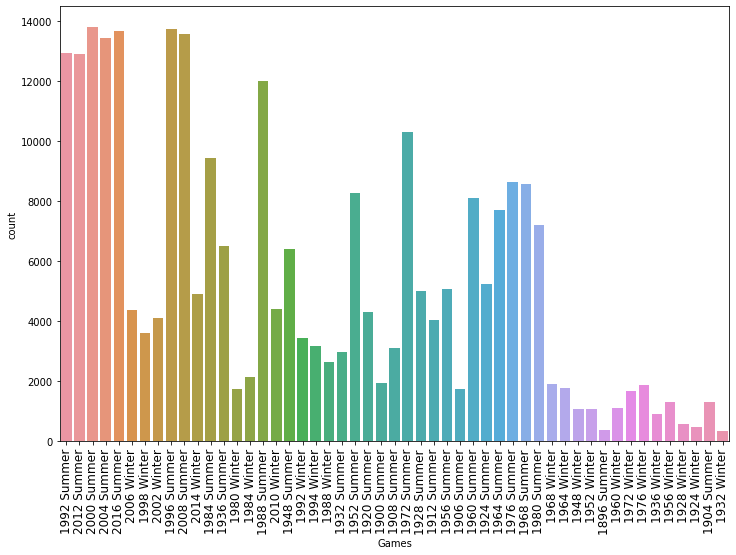

In [ ]:
df.Games.value_counts()
plt.figure(figsize = (12,8))
sns.countplot(x = 'Games',data = df)
plt.xticks(fontsize=12,rotation=90);

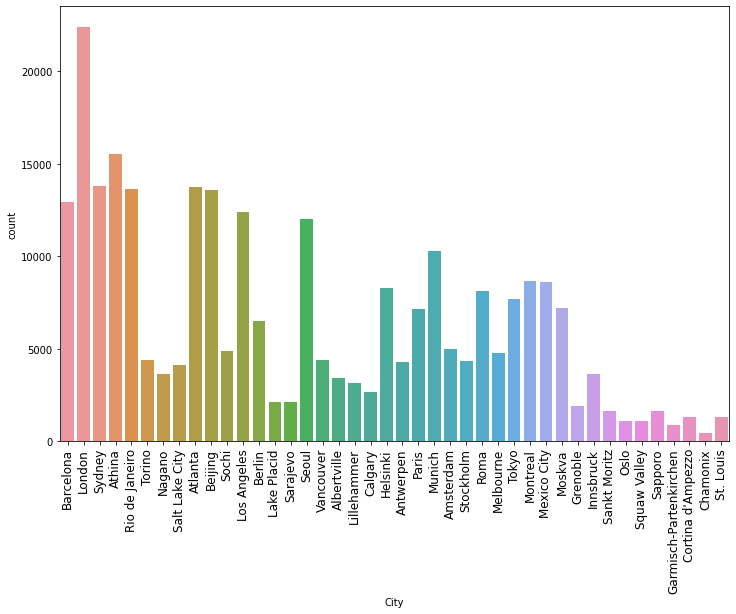

In [ ]:
df.City.value_counts()
plt.figure(figsize = (12,8))
sns.countplot(x = 'City',data = df)
plt.xticks(fontsize=12,rotation=90);

In [ ]:
df.Medal.value_counts()
plt.figure(figsize = (15,12))
sns.countplot(x = 'Medal', data = df, palette=["pink", "purple"] , hue = 'Sex');

In [ ]:
plt.figure(figsize = (30,30))
gold_medals = df[(df.Medal == "Gold")]
top_countries_gold = gold_medals.region.value_counts().reset_index(name = "Medal").head(5)
sns.catplot(x = 'index',y = 'Medal',data = top_countries_gold,kind = "bar", color = 'gold')
plt.title("Gold Medals");

<Figure size 2160x2160 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,12))
silver_medals = df[(df.Medal == "Silver")]
top_countries_silver = silver_medals.region.value_counts().reset_index(name = "Medal").head(5)
sns.catplot(x = 'index',y = 'Medal',data = top_countries_silver,kind = "bar", color = 'Silver', )
plt.title("Silver Medals");

<Figure size 1080x864 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,12))
bronze_medals = df[(df.Medal == "Bronze")]
top_countries_bronze = bronze_medals.region.value_counts().reset_index(name = "Medal").head(5)
sns.catplot(x = 'index',y = 'Medal',data = top_countries_bronze,kind = "bar", color = 'brown')
plt.title("Bronze Medals");

NameError: ignored

In [ ]:
plt.figure(figsize = (15,12))
bronze_medals = df[(df.Medal == "Bronze")]
top_countries_bronze = bronze_medals.region.value_counts().reset_index(name = "Medal").head(5)
sns.catplot(x = 'index',y = 'Medal',data = top_countries_bronze,kind = "bar", color = 'brown')
plt.title("Bronze Medals");

In [ ]:
import seaborn as sns
gold_medals = df[(df.Medal == "Gold")]
GOLDMEDALSUSA = gold_medals.loc[gold_medals['NOC'] == 'USA']
GOLDMEDALSUSA.Event.value_counts().reset_index(name='Medal').head(10)


index  Medal
0                      Basketball Men's Basketball    186
1    Swimming Men's 4 x 200 metres Freestyle Relay    111
2       Swimming Men's 4 x 100 metres Medley Relay    108
3                        Rowing Men's Coxed Eights    108
4                    Basketball Women's Basketball     95
5             Athletics Men's 4 x 400 metres Relay     81
6     Swimming Women's 4 x 100 metres Medley Relay     79
7  Swimming Women's 4 x 100 metres Freestyle Relay     78
8                        Football Women's Football     66
9             Athletics Men's 4 x 100 metres Relay     63

In [ ]:
# corelation between height and medals won

medals_per_height = df[['Height', 'Medal']]
medals_per_height = medals_per_height.loc[medals_per_height['Medal'] != 'NaN'].groupby('Height').count()
medals_per_height = medals_per_height.reset_index()


# let's assume that tall people are 175cm and highier
tall_people = medals_per_height.loc[medals_per_height['Height'] >= 175.0].sum()
tall_people = tall_people['Medal']

short_people = medals_per_height.loc[medals_per_height['Height'] < 175.0].sum()
short_people = short_people['Medal']

print('Tall people medals: ', int(tall_people))
print('Short people medals: ', int(short_people))

# let's look at corelation
px.bar(data_frame=medals_per_height, x='Height', y='Medal', title = 'The corelation between height and medals won')

Tall people medals:  18970
Short people medals:  12093


In [ ]:
# which sports are dominated by short people

short_people_sports = df[['Height', 'Sport']]

# previously we assume that tall people are 175 cm and highier so short people will be below 175cm 
short_people_sports = short_people_sports.loc[short_people_sports['Height'] < 175.0].groupby('Sport').count().sort_values(by='Height', ascending=False)
short_people_sports = short_people_sports.reset_index()

# let's look at corelation
px.bar(data_frame=short_people_sports[0:10], x='Sport', y='Height', title = "The sports are dominated by short people (under 175cm)");

In [ ]:
# which sports are dominated by short people

short_people_sports = df[['Height', 'Sport']]

# previously we assume that tall people are 175 cm and highier so short people will be below 175cm 
short_people_sports = short_people_sports.loc[short_people_sports['Height'] < 175.0].groupby('Sport').count().sort_values(by='Height', ascending=False)
short_people_sports = short_people_sports.reset_index()

# let's look at corelation
px.bar(data_frame=short_people_sports[0:10], x='Sport', y='Height', title="The sports are dominated by short people (under 175cm)")